# **Compte rendu TP2: Linear Regression**

### <font color=blue>Sahar letaief / 3DNI1 <font/>

### Linear Regression 
The main idea of linear regression is to use data to build a model used to predict future data. <br> 
* **Target** : the predicted data(dependent variable).<br>
* **Features** : the data used to make predictions(independent variables). 



## Exercice 1:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df =pd.read_csv('grav.csv')
df.head()

,height,seconds squared
0,100,8.967
1,120,11.989
2,150,15.852
3,180,16.991
4,200,20.284


In [3]:
X = df.iloc[0:len(df),0]
#selection de deuxième colonnes de notre dataset
Y = df.iloc[0:len(df),1]
print(X,Y)

0    100
1    120
2    150
3    180
4    200
5    250
6    300
Name: height, dtype: int64 0     8.967
1    11.989
2    15.852
3    16.991
4    20.284
5    24.228
6    30.580
Name: seconds squared, dtype: float64


Text(0, 0.5, 'seconds squared')

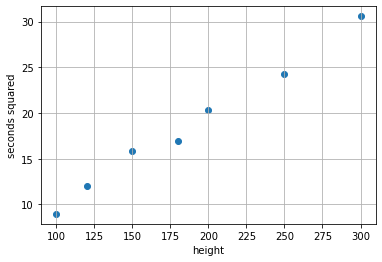

In [4]:
axes = plt.axes()
axes.grid() 
plt.scatter(X,Y) 
plt.xlabel('height')
plt.ylabel('seconds squared')

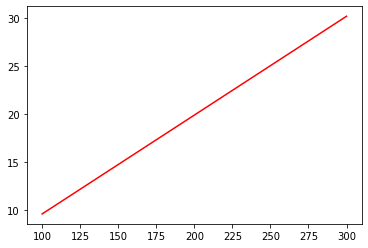

In [5]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
def predict(x):
    return slope * x + intercept
fitLine = predict(X)
plt.plot(X, fitLine, c='r')

the mean gravity value =  10.172358622661353 m/s2


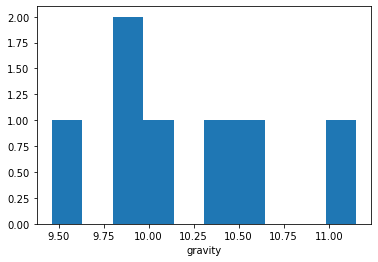

In [6]:
gravity= np.array(X/Y)
plt.hist(gravity)
plt.xlabel('gravity')
gravity_mean= gravity.mean()
print('the mean gravity value = ',gravity_mean, 'm/s2')

## Exercice 2 :

In [7]:
df = pd.read_spss('test_scores.sav')
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   school           2133 non-null   object  
 1   school_setting   2133 non-null   category
 2   school_type      2133 non-null   category
 3   classroom        2133 non-null   object  
 4   teaching_method  2133 non-null   category
 5   n_student        2133 non-null   float64 
 6   student_id       2133 non-null   object  
 7   gender           2133 non-null   category
 8   lunch            2133 non-null   category
 9   pretest          2133 non-null   float64 
 10  posttest         2133 non-null   float64 
dtypes: category(5), float64(3), object(3)
memory usage: 111.0+ KB


In [9]:
print(df.shape)

(2133, 11)


In [10]:
X = df.iloc[ :,9:10].values
y = df.iloc[:, -1].values

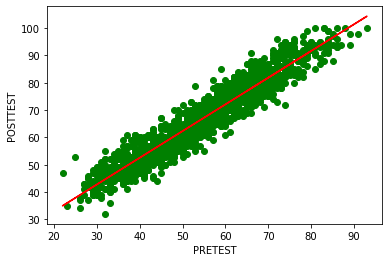

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.xlabel('PRETEST')
plt.ylabel('POSTTEST')
plt.show()

## Exercice 3 :

In [12]:
df = pd.read_csv('housing.data.txt')
print('data _shape', df.shape)
df.head()

data _shape (506, 14)


,CIRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


* The variable MEDV indicates the prices of the houses and is the target variable.<br> The rest of the variables are the predictors based on which we will predict the value of the house.

In [13]:
x = df.drop("MEDV", axis=1)
y = df['MEDV'].to_numpy()

Exploratory Data Analysis is a very important step before training the model.<br> We will use some visualizations to understand the relationship of the target variable with other variables.

* We will first plot the histogram of the target variable MEDV.

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

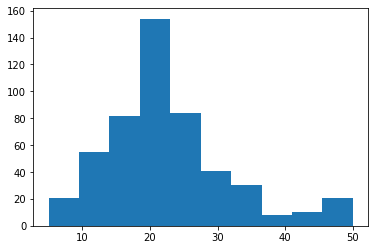

In [14]:
#Print a histogram of the target: MEDV
plt.hist(df.MEDV)

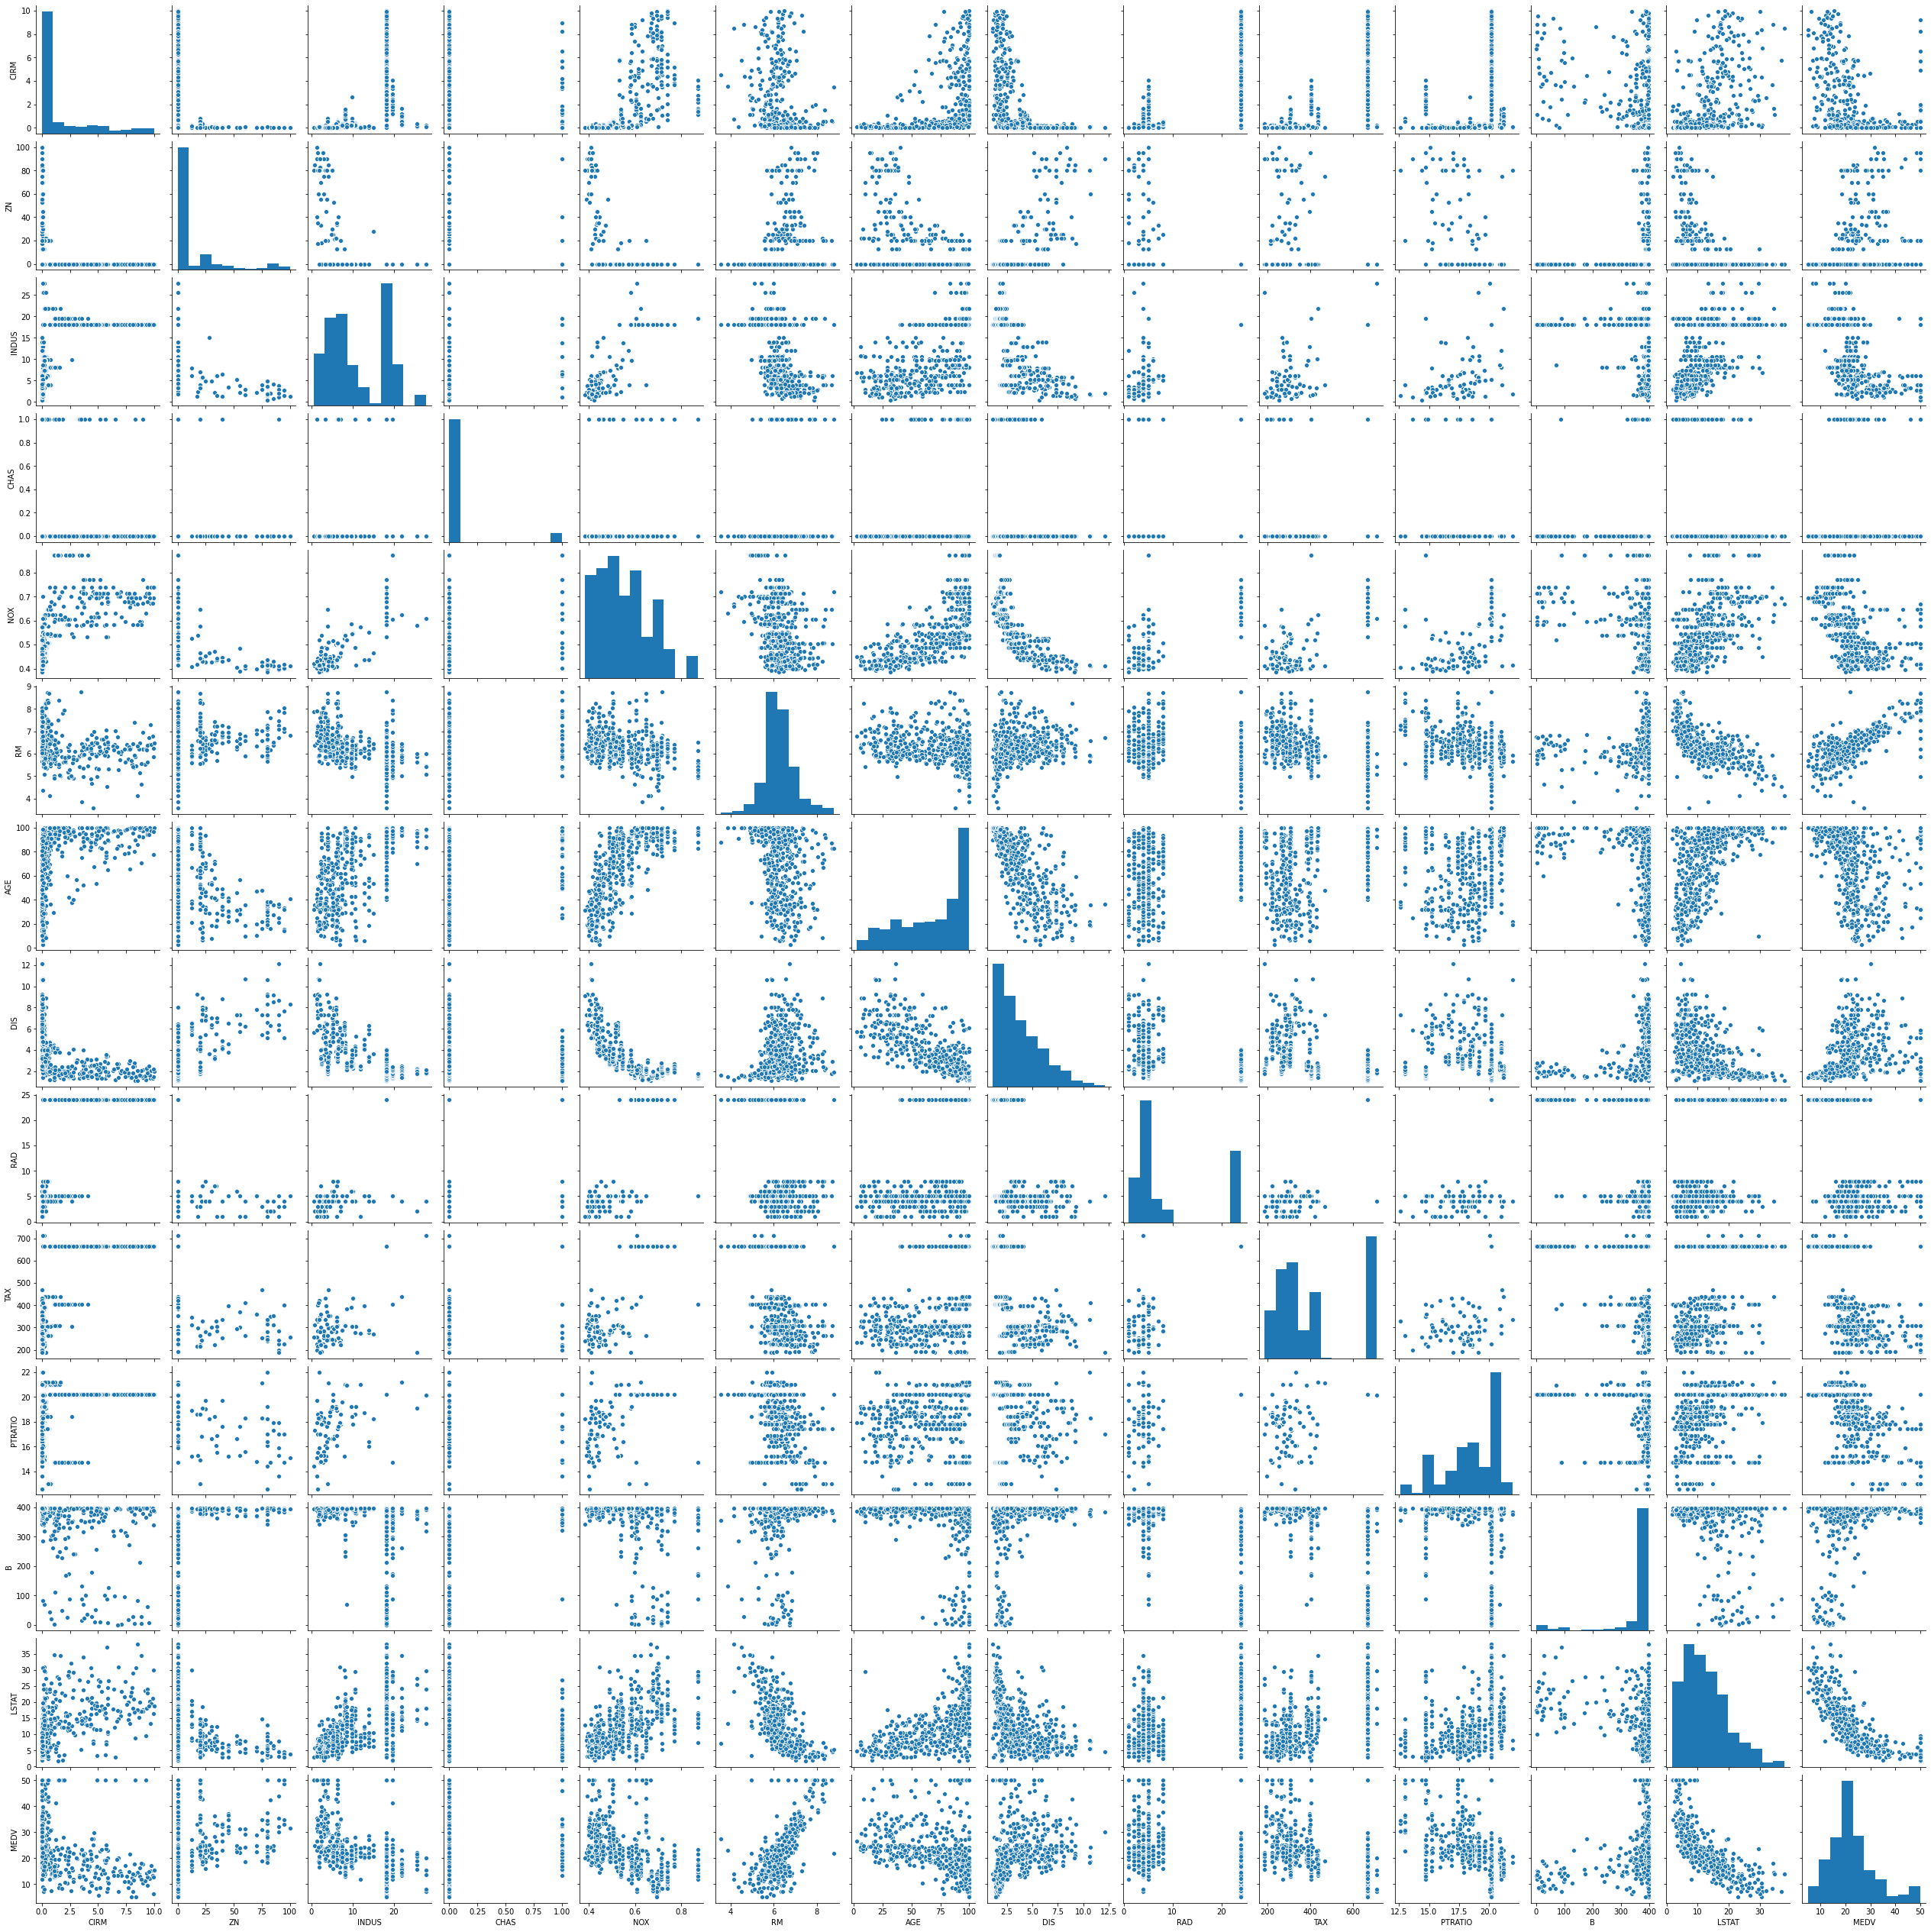

In [15]:
# Show the relationships between all the features present in the dataset.
sns.pairplot(df, vars = ['CIRM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

#### correlation matrix 
A table showing correlation coefficients between variables. Each cell in the table indicates the strength of the association of the observed data for the two variables.

- The correlation coefficient ranges from -1 to 1. <br>
- If the value is close to 1, it means that there is a strong positive correlation between the two variables.<br>
- When it is close to -1, the variables have a strong negative correlation.<br>
- Zero Correlation, when x and y are completely independent.

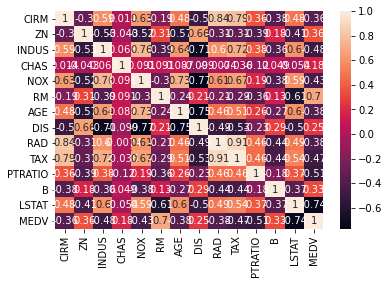

In [16]:
# Plot the correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

In [17]:
from sklearn.model_selection import train_test_split
print('X', np.shape(x), 'y', np.shape(y))
#Split the dataset into training 70% and test data 30% of the samples. 
X_train,X_test,y_train,y_test=train_test_split(x, y,test_size=0.3, random_state=0)
print('X_train:', np.shape(X_train), 'X_test:', np.shape(X_test))

X (506, 13) y (506,)
X_train: (354, 13) X_test: (152, 13)


In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test,y_test)
    
# Prediction on the train data
y_train_pred = lin_reg.predict(X_train)

# Prediction on the test data
y_test_pred = lin_reg.predict(X_test)


In [19]:
coefficients = pd.DataFrame(lin_reg.coef_,x.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
CIRM,-0.390751
ZN,0.042078
INDUS,0.026620
CHAS,2.636315
NOX,-14.027004
RM,3.961338
AGE,-0.007561
DIS,-1.401764
RAD,0.260513
TAX,-0.010818


When  **'Nox'**  increase the house value  **'MEDV'**  decrease (Negative correlation) and if  **'RM'**  increase, the house value increase (Positive correlation).

Text(0.5, 1.0, 'Positive correlation')

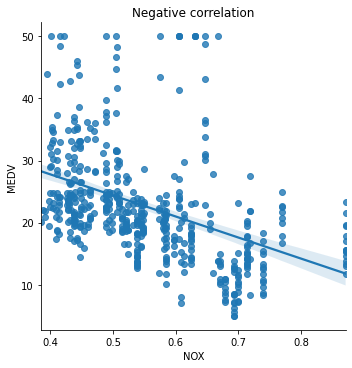

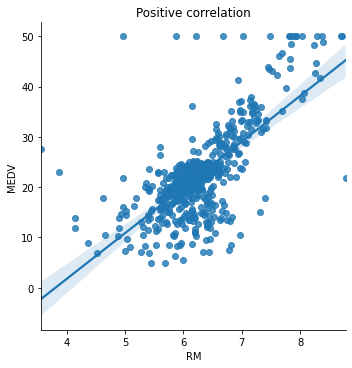

In [20]:
sns.lmplot(x = 'NOX', y = 'MEDV', data = df)
plt.title('Negative correlation')
sns.lmplot(x = 'RM', y = 'MEDV', data = df)
plt.title('Positive correlation')

Text(0, 0.5, 'Y predicted')

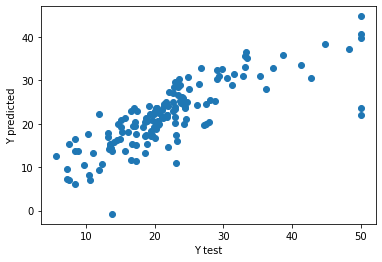

In [21]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Y test')
plt.ylabel('Y predicted')

In [22]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted':y_test_pred })
compare_ech=compare.head(10)
compare_ech

,Actual,Predicted
0,22.6,24.926313
1,50.0,22.081359
2,23.0,29.677644
3,8.3,13.731146
4,21.2,21.417078
5,19.9,19.243130
6,20.6,19.974596
7,18.7,21.332928
8,16.1,18.123906
9,18.6,20.458401


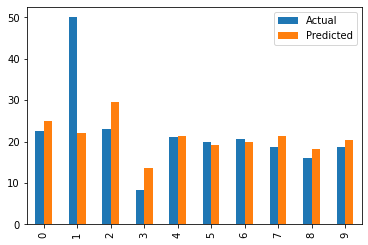

In [23]:
compare_ech.plot(kind = 'bar')

- **From the above graph, we can see that there is not much difference between the actual and predicted values.** 

- **The RMSE :** is the standard deviation of the residuals.
  <br> Residuals are a measure of how far from the regression line data points are.
 - It is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.
<br>

> **Lower values of RMSE indicate better fit <br>
   It indicates the absolute fit of the model** <br> 

- **R-squared :** is a statistical measure of how close the data are to the fitted regression line.<br> It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.
> **it is a relative measure of fit** <br>


In [24]:
from sklearn.metrics import mean_squared_error, r2_score 
 
#Evaluate the model using R2 and RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2 = r2_score(y_train, y_train_pred)
print("Training: R2 =", r2, " et RMSE =", rmse)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)
print("Testing: R2 =", r2, " et RMSE =", rmse)

Training: R2 = 0.7608216501836198  et RMSE = 4.502647716036697
Testing: R2 = 0.6555643709924561  et RMSE = 5.355334297094217


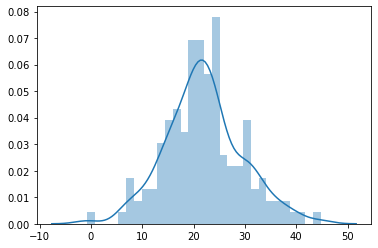

In [25]:
sns.distplot((y_test_pred),bins=30);

In [26]:
pip install watermark

Note: you may need to restart the kernel to use updated packages.


In [28]:
%load_ext watermark
%watermark -p numpy,matplotlib,seaborn,sklearn,scipy,pandas

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
numpy 1.18.5
matplotlib 3.2.2
seaborn 0.10.1
sklearn 0.23.1
scipy 1.5.0
pandas 1.0.5
